<a href="https://colab.research.google.com/github/VIVEK818713/Data-Cleaning/blob/main/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Detecting and Treating Outliers 
##One of the most important steps as part of data preprocessing is detecting and treating the outliers as they can negatively affect the statistical analysis and the training process of a machine learning algorithm resulting in lower accuracy.


#  What are Outliers?
##* An Outlier is an observation in a given dataset that lies far from the rest of the observations. 
##*That means an outlier is vastly larger or smaller than the remaining values in the set.


# What do they affect?
##* In statistics, we have three measures of central tendency namely Mean, Median, and Mode. They help us describe the data.
##* Mean is the accurate measure to describe the data when we do not have any outliers present.
##* Median is used if there is an outlier in the dataset.
##* Mode is used if there is an outlier AND about ½ or more of the data is the same.
##* ‘Mean’ is the only measure of central tendency that is affected by the outliers which in turn impacts Standard deviation


##Example:
##Consider a small dataset, sample= [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]. By looking at it, one can quickly say ‘101’ is an outlier that is much larger than the other values.

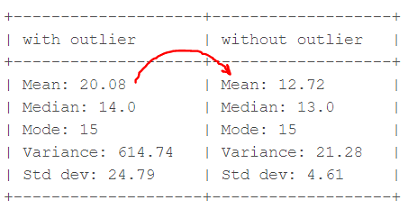

##From the above calculations, we can clearly say the Mean is more affected than the Median.

# Detecting Outliers
##* If our dataset is small, we can detect the outlier by just looking at the dataset. 
##*But what if we have a huge dataset, how do we identify the outliers then? 
##* We need to use visualization and mathematical techniques.
##* Below are some of the techniques of detecting outliers
 1. Boxplots
 2. Z-score
 3. Inter Quantile Range(IQR)


###  Detecting outliers using Boxplot:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
sample= [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]

plt.boxplot(sample, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')

# Detecting outliers using the Z-scores
##Criteria: any data point whose Z-score falls out of 3rd standard deviation is an outlier.

#* Note please first understand 
##1. MEAN ABSOLUTE DEVIATION
##2. STANDARD DEVIATION

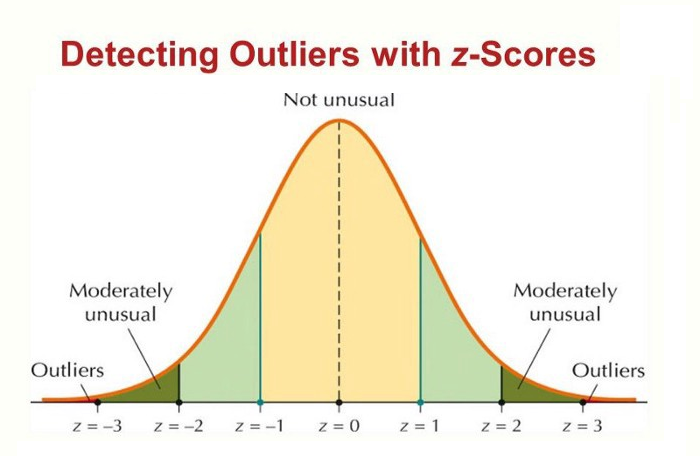

#Lets understand with some example
##* We are going to use heights dataset from kaggle.com.  
##*Dataset has heights and weights both but I have removed weights to make it simple
##* https://www.kaggle.com/mustafaali96/weight-height

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
import os 
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/Colab Notebooks/Kaggle json'

In [ ]:
!kaggle datasets download -d mustafaali96/weight-height

In [ ]:
!unzip weight-height

In [ ]:
df = pd.read_csv("/content/weight-height.csv")
df.head()

In [ ]:
# i have uploaded data in in my google drive so i can access it from there also
# but i am using from kaggle
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA CLEANING/weight-height.csv")
df.head()

### part 1. Outlier detection and removal using Standard Deviation

In [ ]:
df.Height.describe()

## let's check the hitogram

In [ ]:
sns.histplot(df.Height, kde=True)

## Now we are taking mean and standard deviation  of Hieght column

In [ ]:
mean = df.Height.mean()
mean

In [ ]:
std_deviation = df.Height.std()
std_deviation

## let's check 3 standard deviation , most of the people use it

In [ ]:
mean-3*std_deviation 

In [ ]:
mean+3*std_deviation

## if height is < 54.82 or height is > 77.91 then we will say these are outliers

In [ ]:
df[df.Height<54.82]

## Or

In [ ]:
df[df.Height>77.91]

## Lets combine both condition

In [ ]:
df[(df.Height < 54.82) | (df.Height > 77.91)]

## here we have 7 points outoff 10000 as outliers
## Now we want a dataframe without outliers so we will change the condition. check the below code

In [ ]:
df_no_outlier = df[(df.Height<77.91) & (df.Height>54.82)]
df_no_outlier.shape

## if you undersatnd the standard deviation then z-score is almost same.

# Part 2.Outlier detection and removal using Z Score

##Z score is a way to achieve same thing that we did above in part (1)

##Z score indicates how many standard deviation away a data point is from mean.

##Z score always calculate dfor individual data point not for whole dataframe

##For example in our case mean is 66.37 and standard deviation is 3.84.

##If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

##Calculate the Z Score


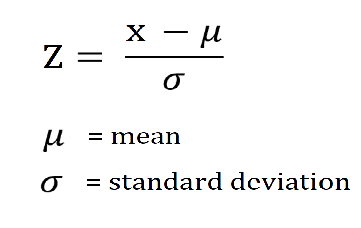



##Let's add a new column in our dataframe for this Z score

In [ ]:
df['zscore'] = ( df.Height - df.Height.mean() ) / df.Height.std()
df.head(5)

## Above for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean

##Let'scheck whether it is right or not

In [ ]:
df.Height.mean()

In [ ]:
df.Height.std()

In [ ]:
(73.84-66.37)/3.84

In [ ]:
df[df['zscore']>3]

In [ ]:
df[df['zscore']<-3]

In [ ]:
df[(df.zscore<-3)|(df.zscore>3)]

## it is same datapoint as we calculated in standard deviation.


## 4.3 Detecting outliers using the Inter Quantile Range(IQR)

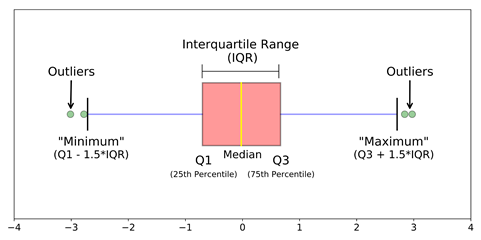

##Rule: data points that lie 1.5 times of IQR above Q3 and below Q1 are outliers.

##steps: 
## Sort the dataset in ascending order
## calculate the 1st and 3rd quartiles(Q1, Q3)
## compute IQR=Q3-Q1
## compute lower bound = (Q1 – 1.5 * IQR), upper bound = (Q3 + 1.5 * IQR)
## Any data point outside this range is considered as outlier and should be removed for further analysis.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Create a sample dataset with outliers

In [ ]:
data={'index':[1,2,3,4,5,6,7,8,9,10,11],
               'Salary':[1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,20000]}
sample = pd.DataFrame(data)

In [ ]:
sample.head()

In [ ]:
#plt.plot(sample)
plt.scatter(sample.Salary,sample.index,marker='*')


##* In this dataset, 20000 is the extreme value. Lets check whether the 1.5IQR rule helps us !
##* Lets write the outlier function that will return us the lowerbound and upperbound values.

In [ ]:
sample.describe()

In [ ]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

##Using the above function, lets get the lowerbound and upperbound values

In [ ]:
lowerbound,upperbound = outlier_treatment(sample.Salary)

In [ ]:
print(lowerbound,upperbound)

##Lets check which column is considered as an outlier

In [ ]:
sample[(sample.Salary < lowerbound) | (sample.Salary > upperbound)]


##Now lets remove the outliers from the dataset.

In [ ]:
sample.drop(sample[ (sample.Salary > upperbound) | (sample.Salary < lowerbound) ].index , inplace=True)


##Lets see the scatter plot after outlier removal

In [ ]:
#plt.plot(sample)
plt.scatter(sample.Salary,sample.index,marker='*')


## Handson with dataset on removing outliers using IQR

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA CLEANING/IQR DATA.csv')
df.head()

In [ ]:
df.shape

In [ ]:
df.describe()

##Check the outliers 


In [ ]:
plt.figure(figsize=(16,6))
plt.scatter(df['name'],df['height'],marker='*')
plt.show()

##Detect outliers using IQR

In [ ]:
Q1 = df.height.quantile(0.25)
Q3 = df.height.quantile(0.75)
Q1, Q3

##calculate IQR

In [ ]:
IQR = Q3 - Q1
IQR

##Calculate lower and upper limit

In [ ]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

##Now we are going to see what are the outliers in our data

In [ ]:
df[(df.height<lower_limit)|(df.height>upper_limit)]

##Now our task is to remove these outliers
##* we will remove outliers and create a dataset witout outliers

In [ ]:
df_no_outlier = df[(df.height>lower_limit)&(df.height<upper_limit)]
df_no_outlier

In [ ]:
df_no_outlier.shape

### Exercise 1
You are given height_weight.csv file which contains heights and weights of 1000 people. Dataset is taken from here, https://www.kaggle.com/mustafaali96/weight-height

You need to do this,

(1) Load this csv in pandas dataframe and first plot histograms for height and weight parameters

(2) Using IQR detect weight outliers and print them

(3) Using IQR, detect height outliers and print them

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA CLEANING/excersize 1.csv')
df.head()

In [ ]:
df.shape

Histgram for weights

In [ ]:
plt.hist(df.Weight, bins=20, rwidth=0.8)
plt.xlabel('weight')
plt.ylabel('Count')
plt.show()

Histgram for heights

In [ ]:
plt.hist(df.Height, bins=20, rwidth=0.8)
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

Detect outliers based on weight

In [ ]:
Q1 = df.Weight.quantile(0.25)
Q3 = df.Weight.quantile(0.75)
Q1, Q3

In [ ]:
IQR = Q3 - Q1
IQR

In [ ]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

In [ ]:
df.Weight.describe()

In [ ]:
df[(df.Weight<lower_limit)|(df.Weight>upper_limit)]

In [ ]:
#df_no_outlier = df[(df.Height>lower_limit)&(df.Height<upper_limit)]
df_no_outlier_weight = df[(df.Weight>lower_limit)&(df.Weight<upper_limit)]
df_no_outlier_weight.shape

Detect outliers based on height

In [ ]:
Q1 = df.Height.quantile(0.25)
Q3 = df.Height.quantile(0.75)
Q1, Q3

In [ ]:
IQR = Q3 - Q1
IQR

In [ ]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

In [ ]:
df.Height.describe()

In [ ]:
df[(df.Height<lower_limit)|(df.Height>upper_limit)]

In [ ]:
# NOW REMOVE THIS OUTLIERS FROM THE DATASET AND CREATE NEW DATASET

In [ ]:
df_no_outlier = df[(df.Height>lower_limit)&(df.Height<upper_limit)]

df_no_outlier.shape

### Exercise 2
You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [ ]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [ ]:
df =pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA CLEANING/bhp.csv")
df.head()

We will quickly examine price_per_sqft column to check min,max,mean and percentile values

In [ ]:
df.price_per_sqft.describe()

Above, you can see max is 12000000, which is too much price for price per sqft. Looks like this dataset has some very bad outliers so we will first remove those with percentile and then use z score

Also plot histogram to see how is the data distribution

In [ ]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

Using log scale can make visualization little better

In [ ]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

You see atleast few bars on right hand side of our highest building at least 

### (1) Treat outliers using percentile first

In [ ]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

In [ ]:
outliers = df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]
outliers.sample(10)

Above shows properties that has price_per_sqft value such as 500 rs which is very very low for the city of banglore. You would be very lucky if you can find such as property :) Also we have properties that has price per sqft value such as 12000000 which is way too high. It seems almost impossible and even if it is legitimate it can help data analysis process if we remove such a data point

In [ ]:
df2 = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df2.shape

In [ ]:
df.shape

In [ ]:
df.shape[0] - df2.shape[0]

We removed total 28 outliers

### (2) Now remove outliers using 4 standard deviation

In [ ]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

In [ ]:
df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)].sample(10)

In [ ]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

In [ ]:
df2.shape[0]-df3.shape[0]

In this step we removed total 125 outliers

In [ ]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

In [ ]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

### (3) Now remove outliers using z score. Use z score of 4 as your thresold

In [ ]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

In [ ]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

In [ ]:
outliers_z.sample(5)

In [ ]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

In [ ]:
df2.shape[0] - df4.shape[0]